# PW6 Strom und Spannungsquellen


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from IPython.display import display, Markdown, Latex
import pandas as pd
from uncertainties import ufloat

## Solarzellen als Gleichstromquelle

### Durchführung und Aufbau

### Unsicherheiten und Messgeräte

### Ergebnisse

,U [V],U_I [V],I [A],P [W]
0,0.020000,0.520000,1.040000,0.020800
1,0.100000,0.490000,0.980000,0.098000
2,0.200000,0.440000,0.880000,0.176000
3,0.300000,0.370000,0.740000,0.222000
4,0.400000,0.280000,0.560000,0.224000
5,0.500000,0.180000,0.360000,0.180000
6,0.550000,0.100000,0.200000,0.110000
7,0.580000,0.020000,0.040000,0.023200


$$U_{LL} = 0.59+/-0.06\,\text{V}$$

$$ I_{KS} = 1.1+/-0.1\,\text{A}$$

$$ P_{max} = 0.22+/-0.02\,\text{W}$$

$$ R_{L,max} = 0.7+/-0.1\,\Omega$$

$$ C_{FF} = 0.36+/-0.06$$

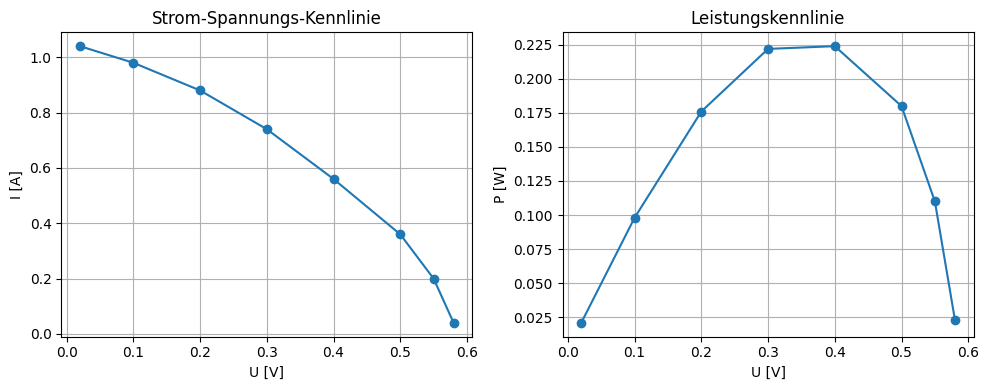

In [29]:
U = np.array([0.02, 0.10, 0.20, 0.30, 0.40, 0.50, 0.55, 0.58])
U_I = np.array([0.52, 0.49, 0.44, 0.37, 0.28, 0.18, 0.10, 0.02])
R_I = 0.5

I = U_I / R_I
P = U * I

I_k, I_d, I_r, _, I_std = linregress(U[:int(len(U)/3)],I[:int(len(U)/3)])

U_k, U_d, U_r, _, U_std = linregress(I[int(2*len(U)/3):],U[int(2*len(U)/3):])

I_KS = ufloat(I_d,I_d*0.1)
U_LL = ufloat(U_d,U_d*0.1)
#I_KS = ufloat(np.max(I),np.max(I)*0.1)
#U_LL = ufloat(np.max(U),np.max(U)*0.1)
idx_max = np.argmax(P)
U_opt = ufloat(U[idx_max],U[idx_max]*0.1)
I_opt = ufloat(I[idx_max],I[idx_max]*0.1)
P_max = ufloat(P[idx_max],P[idx_max]*0.1)
R_L_max = U_opt / I_opt
C_FF = P_max / (I_KS * U_LL)

data = {'U [V]': U, 'U_I [V]': U_I, 'I [A]': I, 'P [W]': P}
df = pd.DataFrame(data)
display(df.style.set_caption("Messwerte und berechnete Größen"))

display(Markdown(f"$$U_{{LL}} = {U_LL:.1u}\\,\\text{{V}}$$"))
display(Markdown(f"$$ I_{{KS}} = {I_KS:.1u}\\,\\text{{A}}$$"))
display(Markdown(f"$$ P_{{max}} = {P_max:.1u}\\,\\text{{W}}$$"))
display(Markdown(f"$$ R_{{L,max}} = {R_L_max:.1u}\\,\\Omega$$"))
display(Markdown(f"$$ C_{{FF}} = {C_FF:.1u}$$"))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(U, I, 'o-')
plt.xlabel('U [V]')
plt.ylabel('I [A]')
plt.title('Strom-Spannungs-Kennlinie')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(U, P, 'o-')
plt.xlabel('U [V]')
plt.ylabel('P [W]')
plt.title('Leistungskennlinie')
plt.grid(True)
plt.tight_layout()
plt.show()

## Reale Spannungsquelle

### Durchführung und Aufbau

### Unsicherheiten und Messgeräte

### Ergebnisse